<a href="https://colab.research.google.com/github/my000own000files1/Fuzzy/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# установка пакета из форка репозитория с необходимыми изменениями
!git clone https://github.com/my000own000files1/scikit-fuzzy.git

fatal: destination path 'scikit-fuzzy' already exists and is not an empty directory.
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /content


In [ ]:
!cd scikit-fuzzy/

In [ ]:
!pip install -e .

In [ ]:
# удаление старого и установка нового пакета из форка репозитория с необходимыми изменениями
#!rm -r scikit-fuzzy/

Cloning into 'scikit-fuzzy'...
remote: Enumerating objects: 2535, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 2535 (delta 14), reused 3 (delta 0), pack-reused 2508
Receiving objects: 100% (2535/2535), 5.01 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (1528/1528), done.
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /content


In [2]:
#установка оригинального репозитория 
#!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 26.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=cae6ead9220deabd0b4126b62dc8b58fa58d7c4814bc809ce302c381c18e9318
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Сгенерировали нечёткую систему:

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
N=10000 # нужно для приближения к Singletons
step=1/N
X = ctrl.Antecedent(np.arange(-20, 21, 1), 'X')
Y = ctrl.Consequent(np.linspace(0, 1, int(N+1)), 'Y')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
cuant = ['NL','NS','NULL','PS','PL']
X[cuant[0]] = fuzz.trimf(X.universe, [-20, -20, -2])
X[cuant[1]] = fuzz.trimf(X.universe, [-20, -2, 0])
X[cuant[2]] = fuzz.trimf(X.universe, [-2, 0,2])
X[cuant[3]] = fuzz.trimf(X.universe, [0, 2, 20])
X[cuant[4]] = fuzz.trimf(X.universe, [2, 20, 20])

step = 0.1
Y[cuant[0]] = fuzz.trimf(Y.universe, [0, 0, 0+step])
Y[cuant[1]] = fuzz.trimf(Y.universe, [0.1-step, 0.1, 0.1+step])
Y[cuant[2]] = fuzz.trimf(Y.universe, [0.5-step, 0.5, 0.5+step])
Y[cuant[3]] = fuzz.trimf(Y.universe, [0.9-step, 0.9, 0.9+step])
Y[cuant[4]] = fuzz.trimf(Y.universe, [1-step, 1, 1])

# You can see how these look with .view()
X.view()
Y.view()

ModuleNotFoundError: ignored

In [4]:
#создание базы правил нечеткой системы
#Fuzzy rules
rule1 = ctrl.Rule(X[cuant[0]], Y[cuant[4]])
rule2 = ctrl.Rule(X[cuant[1]], Y[cuant[3]])
rule3 = ctrl.Rule(X[cuant[2]], Y[cuant[2]])
rule4 = ctrl.Rule(X[cuant[3]], Y[cuant[1]])
rule5 = ctrl.Rule(X[cuant[4]], Y[cuant[0]])

In [5]:
#Control System Creation and Simulation
sys_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4 , rule5])
sys_sim = ctrl.ControlSystemSimulation(sys_ctrl)

In [ ]:
N = 1000 ; # кол-во точек в линейной функции входа 
x_min=-20
x_max=20
#step = (x_max-x_min)/N
x_in = np.linspace(x_min,x_max,N+1) #формируем входной массив для x для построения графика
y_out = []
for x in x_in:
  sys_sim.input['X'] = x
  sys_sim.compute()
  y_out.extend([sys_sim.output['Y']])

fig = plt.figure()
plt.plot(x_in, y_out)
plt.title('Статическая характеристика нечёткого регулятора')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)

0.909335369091019


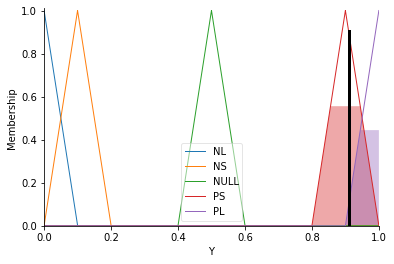

In [6]:
sys_sim.input['X'] = -10
sys_sim.compute()

print( sys_sim.output['Y'])
Y.view(sim=sys_sim)